Никитин Роман ПИ18-2 Номер 70 Вариант 5

In [20]:
import pandas as pd
import time
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
import xgboost as xgb

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

Датасет https://www.kaggle.com/caparrini/beatsdataset
Each row is an electronic music song. The dataset contains 100 song for each genre among 23 electronic music genres, they were the top (100) songs of their genres on November 2016. The 71 columns are audio features extracted of a two random minutes sample of the file audio. These features have been extracted using pyAudioAnalysis

Вариант 5. Исследование влияния обучения без учителя на эффективность обучения.

Данный вариант предполагает фокусировку на использовании методов обучения без учителя для ускорения или повышения эффективности обучения с учителем. Следует подготовить модель к обучению, обучить модель и зафиксировать начальный уровень эффективности. Затем следует попробовать применить понижение размерности, обнаружение аномалий или кластеризацию (в любой комбинации) для трансформации исходного датасета.

В конце работы следует сделать значимый вывод об изменении скорости и эффективности обучения с учителем.

In [3]:
df = pd.read_csv('data.csv')

print("The dataset has {} rows and {} columns.".format(*df.shape))

print("It contains {} duplicates.".format(df.duplicated().sum()))

The dataset has 2300 rows and 73 columns.
It contains 0 duplicates.


In [4]:
df.head()

,Unnamed: 0,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,...,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia,class
0,0,0.136440,0.088861,3.201201,0.262825,0.249212,1.114423,0.007003,0.256682,-22.723259,...,0.003431,0.004981,0.010818,0.024001,0.005201,0.015056,133.333333,0.132792,128.0,BigRoom
1,1,0.117039,0.108389,3.194001,0.247657,0.250288,1.065668,0.005387,0.199821,-21.775871,...,0.004461,0.006441,0.007469,0.015499,0.005589,0.019339,120.000000,0.112767,126.0,BigRoom
2,2,0.085308,0.128525,3.123837,0.217205,0.228652,0.789647,0.008247,0.156822,-22.472722,...,0.001529,0.004556,0.007723,0.017482,0.002901,0.022201,133.333333,0.123373,129.0,BigRoom
3,3,0.103050,0.167042,3.150830,0.233593,0.245032,0.967082,0.006571,0.168083,-21.470751,...,0.001591,0.003514,0.009477,0.023162,0.004165,0.015379,133.333333,0.158876,129.0,BigRoom
4,4,0.151730,0.148405,3.194498,0.293730,0.267231,1.353005,0.003872,0.292055,-21.371157,...,0.003945,0.004131,0.011330,0.028188,0.002639,0.019079,133.333333,0.190708,129.0,BigRoom


In [6]:
#Просмотр уникальных записей и количества каждого из уникальных
df['class'].value_counts()

FunkRAndB               100
TechHouse               100
ProgressiveHouse        100
House                   100
ElectronicaDowntempo    100
Techno                  100
DeepHouse               100
DrumAndBass             100
FutureHouse             100
Minimal                 100
HipHop                  100
Trance                  100
Breaks                  100
IndieDanceNuDisco       100
BigRoom                 100
ReggaeDub               100
Dubstep                 100
PsyTrance               100
HardDance               100
ElectroHouse            100
GlitchHop               100
Dance                   100
HardcoreHardTechno      100
Name: class, dtype: int64

Датасет у меня о музыке и целевая переменная- жанр музыки, следовательно переде мной стоит задача мультиклассовой классификации

In [7]:
#Описание всего датасета
df.describe()

,Unnamed: 0,1-ZCRm,2-Energym,3-EnergyEntropym,4-SpectralCentroidm,5-SpectralSpreadm,6-SpectralEntropym,7-SpectralFluxm,8-SpectralRolloffm,9-MFCCs1m,...,62-ChromaVector7std,63-ChromaVector8std,64-ChromaVector9std,65-ChromaVector10std,66-ChromaVector11std,67-ChromaVector12std,68-ChromaDeviationstd,69-BPM,70-BPMconf,71-BPMessentia
count,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,...,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000,2300.000000
mean,1149.500000,0.107736,0.104252,3.110511,0.235583,0.241407,0.906137,0.010705,0.190545,-23.166806,...,0.067540,0.002632,0.004919,0.009917,0.030616,0.004141,0.019852,148.225537,0.169310,120.948696
std,664.097131,0.037105,0.040966,0.070925,0.043585,0.019559,0.341512,0.005387,0.080169,1.177417,...,0.020457,0.001806,0.002664,0.004558,0.011572,0.002492,0.004403,46.641160,0.056806,17.101925
min,0.000000,0.017122,0.004948,2.746105,0.082685,0.151738,0.034159,0.002689,0.011842,-30.378954,...,0.017597,0.000162,0.000500,0.002169,0.004175,0.000277,0.005532,63.157895,0.073337,61.000000
25%,574.750000,0.080967,0.075864,3.065538,0.206125,0.229695,0.656444,0.006757,0.131162,-23.933393,...,0.052684,0.001449,0.003116,0.006996,0.022527,0.002450,0.016837,120.000000,0.126604,117.000000
50%,1149.500000,0.107538,0.099977,3.117441,0.237552,0.243182,0.911085,0.009582,0.186282,-23.085501,...,0.065773,0.002220,0.004425,0.008975,0.028599,0.003641,0.019591,133.333333,0.156258,125.000000
75%,1724.250000,0.132890,0.128128,3.163833,0.266697,0.255137,1.155127,0.013129,0.243637,-22.279678,...,0.080211,0.003338,0.006053,0.011637,0.036699,0.005206,0.022443,150.000000,0.200570,129.000000
max,2299.000000,0.246659,0.281533,3.254153,0.373731,0.300685,1.958840,0.052735,0.483745,-20.129200,...,0.143270,0.027122,0.027724,0.047819,0.096128,0.028739,0.040736,600.000000,0.422992,188.000000


In [9]:
#Подсчет пропущенных значений
df.isna().sum()

Unnamed: 0               0
1-ZCRm                   0
2-Energym                0
3-EnergyEntropym         0
4-SpectralCentroidm      0
                        ..
68-ChromaDeviationstd    0
69-BPM                   0
70-BPMconf               0
71-BPMessentia           0
class                    0
Length: 73, dtype: int64

In [10]:
#Просмотр информации по датасету, о типах переменных в строках
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 73 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              2300 non-null   int64  
 1   1-ZCRm                  2300 non-null   float64
 2   2-Energym               2300 non-null   float64
 3   3-EnergyEntropym        2300 non-null   float64
 4   4-SpectralCentroidm     2300 non-null   float64
 5   5-SpectralSpreadm       2300 non-null   float64
 6   6-SpectralEntropym      2300 non-null   float64
 7   7-SpectralFluxm         2300 non-null   float64
 8   8-SpectralRolloffm      2300 non-null   float64
 9   9-MFCCs1m               2300 non-null   float64
 10  10-MFCCs2m              2300 non-null   float64
 11  11-MFCCs3m              2300 non-null   float64
 12  12-MFCCs4m              2300 non-null   float64
 13  13-MFCCs5m              2300 non-null   float64
 14  14-MFCCs6m              2300 non-null   

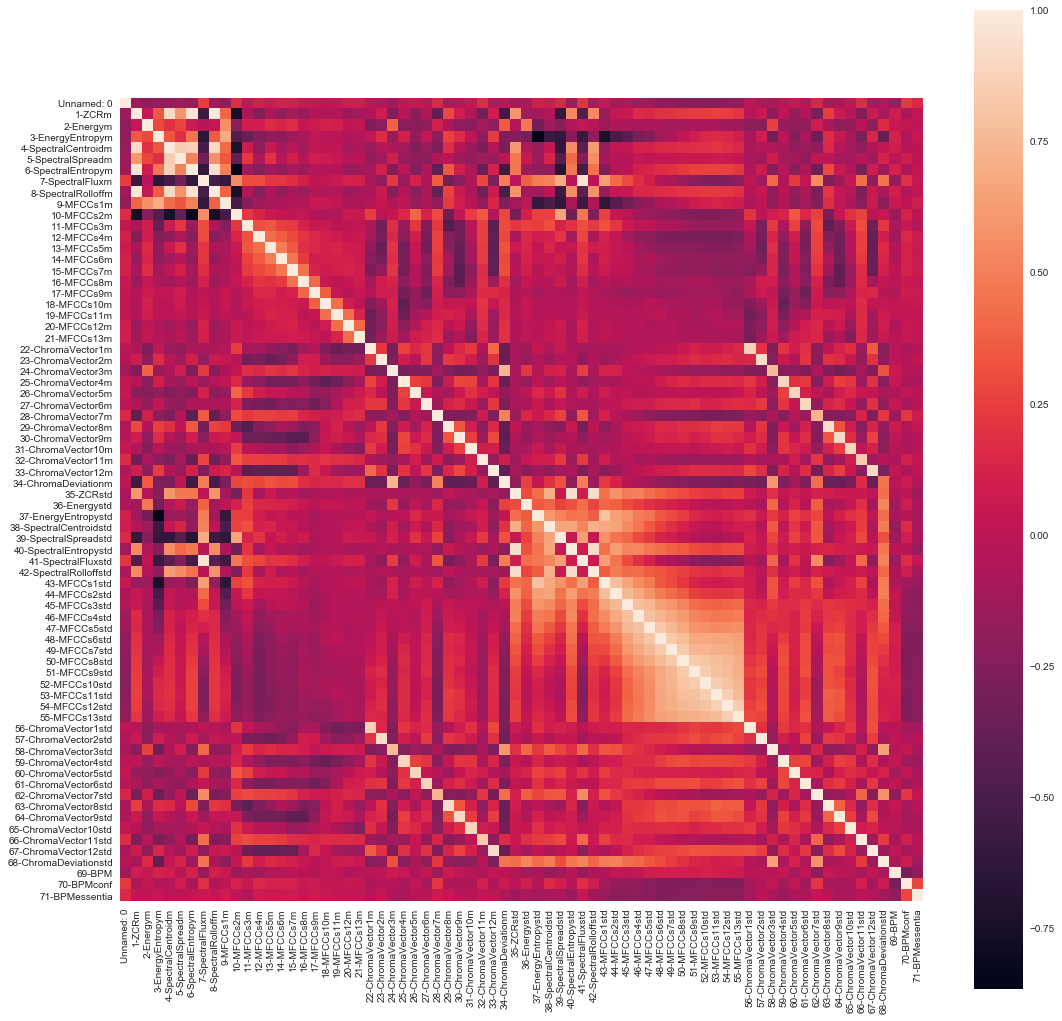

In [11]:
#Хитмап
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, square=True)
plt.show()

In [14]:
#Разбиение датасета
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['class','Unnamed: 0'], axis=1), df['class'], test_size=0.3)

Обучаю простенькую модель

In [23]:
booster = xgb.XGBClassifier()
booster.fit(X_train, y_train)
y_pred_test = booster.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"accuracy: {acc}")

accuracy: 0.5376811594202898


Процент правильно распознанных объектов низковат.

Нахожу лучшее количество опорных векторов

In [42]:
X = df.drop(['class','Unnamed: 0'], axis=1)
target = df['class']
best_acc = 0
for i in range(3,10):
    pca = PCA(n_components=i)
    new_features = StandardScaler().fit_transform(X)
    new_features = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(new_features, target, test_size=0.3)
    
    booster = xgb.XGBClassifier()

    booster.fit(X_train, y_train)
    y_pred_test = booster.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    if best_acc < acc:
        best_acc = acc
    print("accuracy: {}, PCA_num: {}".format(best_acc, i))
print(best_acc)

accuracy: 0.3492753623188406, PCA_num: 3
accuracy: 0.4028985507246377, PCA_num: 4
accuracy: 0.4057971014492754, PCA_num: 5
accuracy: 0.40869565217391307, PCA_num: 6
accuracy: 0.41884057971014493, PCA_num: 7
accuracy: 0.42028985507246375, PCA_num: 8
accuracy: 0.4405797101449275, PCA_num: 9
0.4405797101449275


Результаты значинельно упали. Это нормально, зато теперь обучаться будет явно быстрее. Буду считать, что оптимальное число опорных векторов- 9 (так как акьюраси практически не растет). Запускаю Грид.

Результаты упали из за понижения размерности.

In [44]:
#Бустер на мини-гриде с PCA
pca = PCA(n_components=9)
new_features = StandardScaler().fit_transform(X)
new_features = pca.fit_transform(new_features)
X_train, X_test, y_train, y_test = train_test_split(new_features, target, test_size=0.3)

booster = xgb.XGBClassifier()
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.05], 
              'max_depth': [3, 4, 5],
              'colsample_bytree': [0.6, 0.7],
              'gamma': [0.1, 0.2]}

booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1, verbose=True)

booster_grid_search.fit(X_train, y_train)

print(booster_grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.8min finished


{'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}


In [45]:
booster = xgb.XGBClassifier(colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, 
                           max_depth=3, n_estimators=100)

booster.fit(X_train, y_train)

y_pred_test = booster.predict(X_test)

In [47]:
booster.score(X_train, y_train)

0.6670807453416149

In [48]:
booster.score(X_test, y_test)

0.3115942028985507

In [46]:
acc = accuracy_score(y_test, y_pred_test)
print(f"accuracy: {acc}")

accuracy: 0.3115942028985507


После грида качество модели ухудшилось- она переобучилась. Но не страшно. Грид использовал для замера времени.

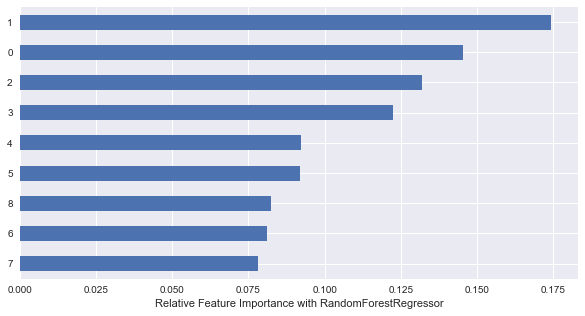

In [54]:
feat_importances = pd.Series(booster.feature_importances_)
feat_importances.nlargest(9).sort_values().plot(kind='barh', figsize=(10,5))
plt.xlabel('Relative Feature Importance with RandomForestRegressor');

Проблема PCA- обезличивание исходных признаков.

Теперь для сравнения запущу грид на исходных данных. В данном случае буду сравнивать время, затраченное на эффективность и сравню метрики качества. (метрики качества после грида сравнить не вышло, так как он так и не дообучился)

In [55]:
#Разбиение датасета
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['class','Unnamed: 0'], axis=1), df['class'], test_size=0.3)

booster = xgb.XGBClassifier()
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.05], 
              'max_depth': [3, 4, 5],
              'colsample_bytree': [0.6, 0.7],
              'gamma': [0.1, 0.2]}

booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1, verbose=True)

booster_grid_search.fit(X_train, y_train)

print(booster_grid_search.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.4min


KeyboardInterrupt: 

Грид выше придется остановить, так как обучается слишком долго (на исходных данных, без применения PCA). 24 модели было обучено за 2 с лишним минуты, когда в случае с PCA- 216 моделей за то же самое время.)

Качество модели значительно упало после применения обучения без учителя. Но зато из за понижения размерности сильно выросла скорость обучения самих моделей. Тут выбор остается за исследователем, зависит от его приоритетов и интересов. Лично я бы выбрал продолжить работать с датасетом без применения PCA.

Что касается акьюраси- без PCA на самой обычной модели на тестовом множестве показало accuracy: 0.5376811594202898, а с PCA - accuracy: 0.4405797101449275, PCA_num: 9, что означает, что процент верно классифицированных объектов упал на 10.